## Task 1: Linear Regression – The nice way! 

In [450]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model

In [451]:
# initialize model 
model = linear_model.LinearRegression()

#setting the random seed
state = np.random.RandomState(42)

In [452]:
# Load the Data
df = pd.read_csv("housingdata.csv", header=None)


# Adds column names to the dataframe
housing_colnames = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = housing_colnames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


13


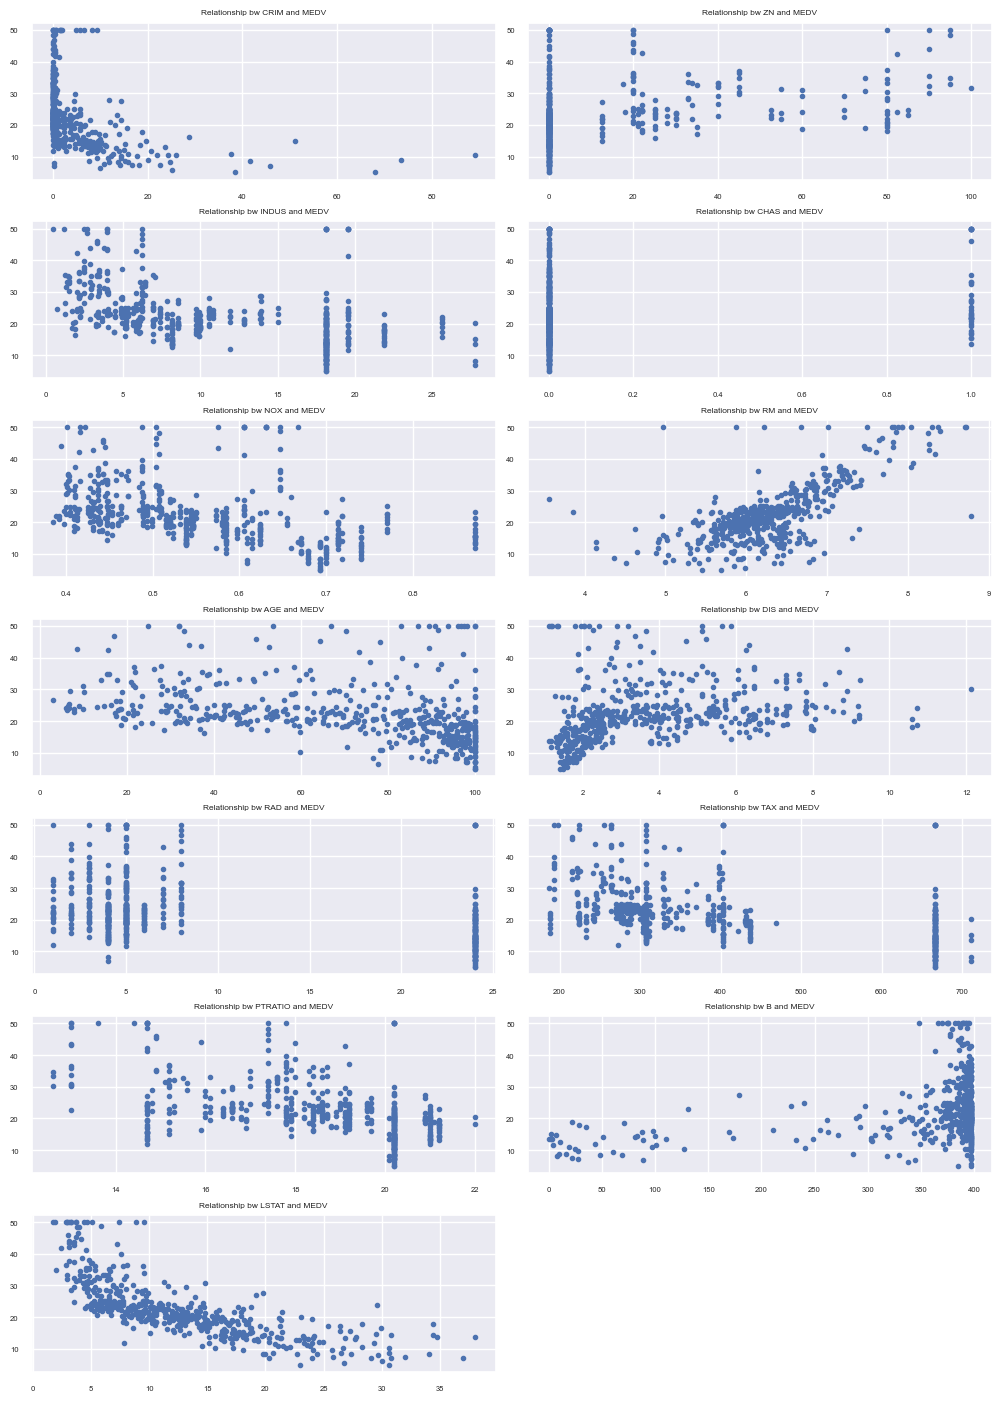

In [453]:
def plotFeatures(col_list, title):
    plt.figure(figsize=(10, 14))

    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col], df["MEDV"], marker=".", linestyle="none")
        plt.title(title % (col))
        plt.tight_layout()

col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
plotFeatures(col_names, "Relationship bw %s and MEDV")   

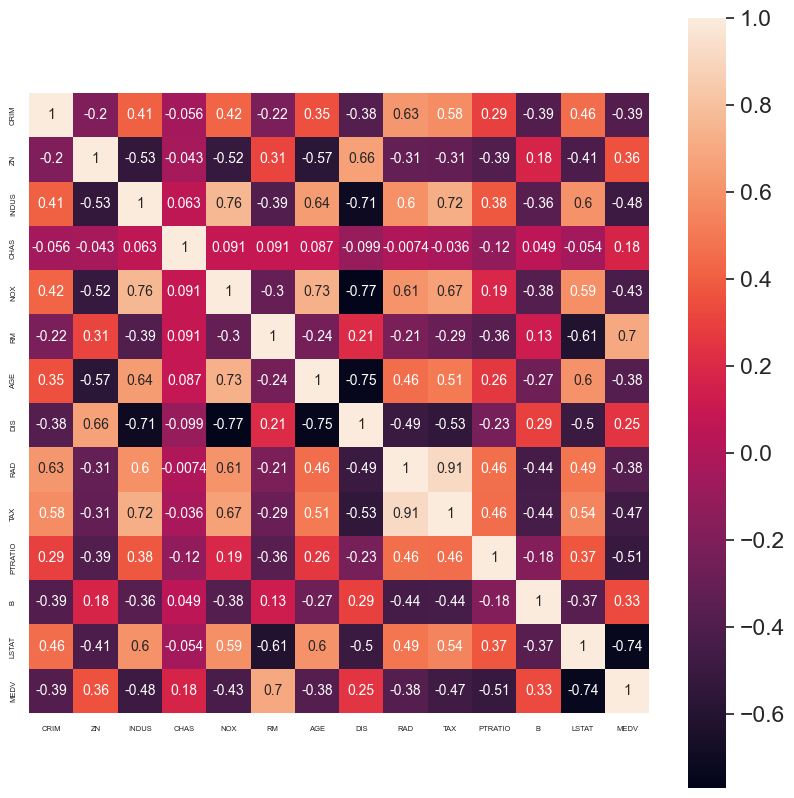

In [454]:
#Creates a heatmap by caculating the correlation of every two columns in the  Dataframe

fig = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), square=True, cbar=True, annot=True, annot_kws={"size":10})
plt.show()

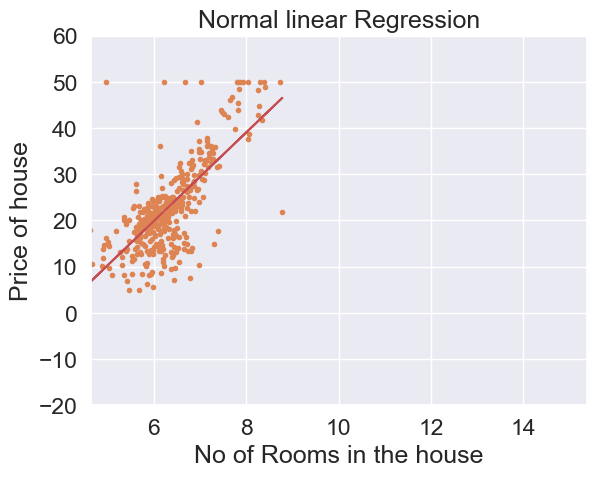

In [455]:
from sklearn import model_selection


def abline(x_test, y_test, predications, title):
    # Plotting lines from the slope
    plt.title(title)
    plt.xlim(0, 20)
    plt.ylim(-20, 60)
    plt.xlabel("No of Rooms in the house")
    plt.ylabel("Price of house")
    plt.gca().set_aspect(0.1, adjustable="datalim")
    plt.plot(x_test, y_test, '.', x_test, predications, "-")
    plt.show()



# getting the data 
X = np.column_stack((np.ones(len(df["RM"])), df["RM"]))
y = df["MEDV"] 


# splitting data into trainig and training sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.8, random_state=state
)


# train model
model.fit(X_train, y_train)


predications = model.predict(X_test)
abline(X_test, y_test, predications, "Normal linear Regression")


## Task 2: Regularization

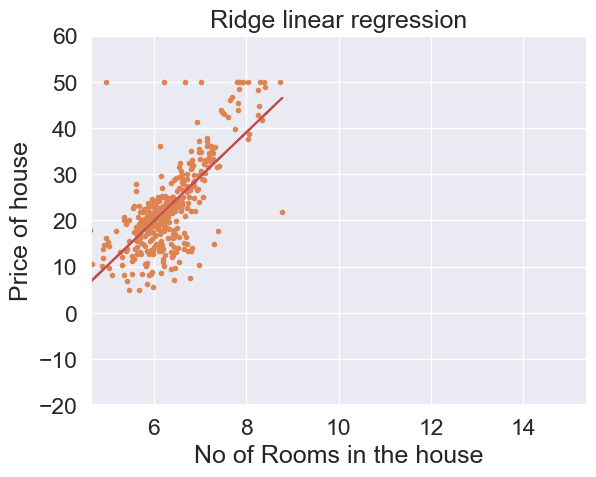

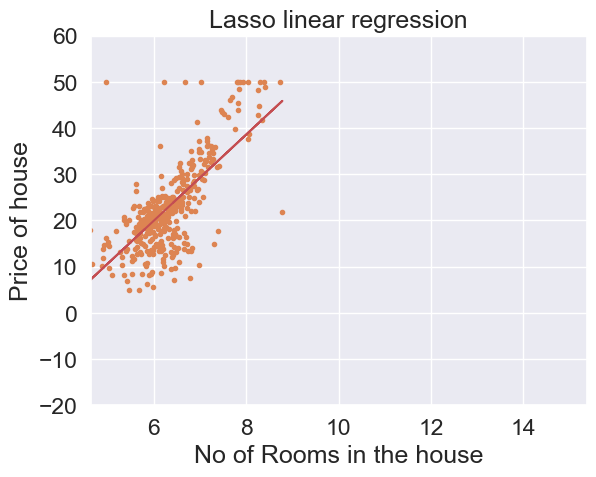

In [456]:
from sklearn import metrics

# Lasso model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


# Ridge model 
ridge = linear_model.Ridge(alpha=2.5)
ridge.fit(X_train, y_train)


def OutputScore(combined_results):
    for heading, score in combined_results:
        print(f"{heading} R Squared score : {score*100}")

def get_scores(*args):
    lst = []
    for i in args:
        lst.append(i.score(X_test, y_test))
    return lst

rig_predicts = ridge.predict(X_test)
abline(X_test, y_test, predications, "Ridge linear regression")

lasso_predict = lasso.predict(X_test)
abline(X_test, y_test, lasso_predict, "Lasso linear regression")


In [457]:
# Testing the training time for Lasso and Ridge models

import time 

def test_model_training(model):
    lst = []
    for i in range(10):
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        lst.append(end-start)
    return sum(lst) / len(lst)

def test_model_testing(model):
    lst = []
    for i in range(10):
        start = time.time()
        model.predict(X_test)
        end = time.time()
        lst.append(end-start)
    return sum(lst) / len(lst)


normal_time = test_model_training(model)
lasso_time = test_model_training(lasso)
ridge_time = test_model_training(ridge)

scores = get_scores(model, lasso, ridge)

table_data = [["Linear", metrics.mean_squared_error(y_test, predications), scores[0], normal_time,   test_model_testing(model)],
        ["Lasso", metrics.mean_squared_error(y_test, lasso_predict), scores[1], lasso_time, test_model_testing(lasso)], 
        ["Ridge", metrics.mean_squared_error(y_test, rig_predicts), scores[2], ridge_time,test_model_testing(ridge) ]
        ]


Table = pd.DataFrame(table_data, columns=["Model", "MSE", "R2", "Train Time x 10", "Test Time x 10"])
Table.head()


,Model,MSE,R2,Train Time x 10,Test Time x 10
0,Linear,45.309791,0.482389,0.00000,0.000000
1,Lasso,45.188152,0.483779,0.00136,0.000000
2,Ridge,45.139779,0.484331,0.00030,0.000063


#### Regularization Answers

b) The generalization error (R squared Score) for Ridge is actually slightly higher than the error from normal Linear regression
c) The plot relatively stays similar to the one from the normal linear regression  
d) yes there is a slight improvement in the time taken to train the ridge model    
e) Not the Lasso model is just slightly faster than both the ridge and normal linear regression model and it performs the worst out of the three when it comes to the generalization error   
f) After playing around with the parameters, the generalization error barely or slight;ly changes but does not make a big wenough difference 
g) Mean absolute error is another loss function and it's formaula is $ 1/n * \sum_ | y_i - ŷ_i |$ . Mean absolute error does increase the penalty from being far away form the predicted value, since it does not square the mean.  
h)  



## Task 3: Logistic Regression as a Classifier

In [458]:
from sklearn import datasets
from sklearn import model_selection

Text(0, 0.5, 'sepal width (cm)')

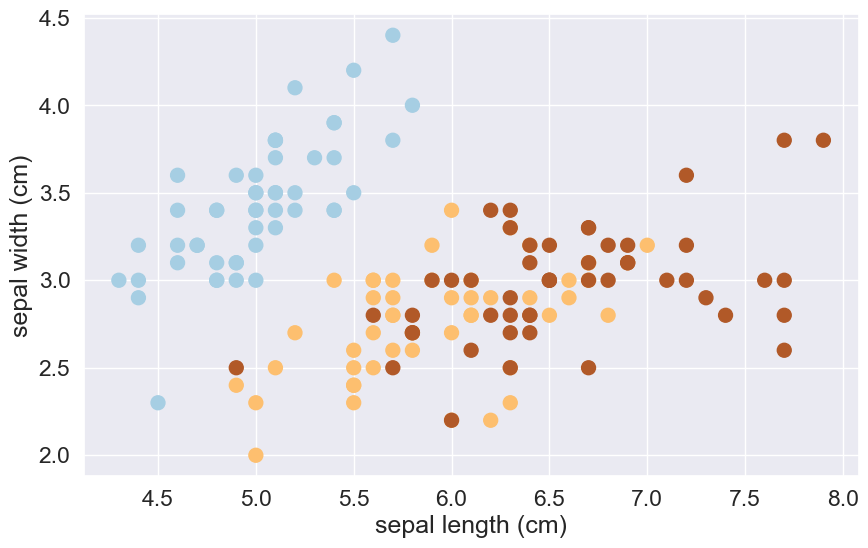

In [459]:
#loading the data
data = datasets.load_iris()
iris_data = pd.DataFrame(data=data.data, columns=data.feature_names)


# Visualizing the data using a scatter plot of the first two features
plt.figure(figsize=(10, 6))
plt.scatter(data.data[:, 0], data.data[:, 1], c=data.target, cmap=plt.cm.Paired, s=100)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

In [460]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data.data, data.target, test_size=0.8, random_state=state
)

In [461]:
from sklearn.linear_model import LogisticRegression
# training the model

iris_model = LogisticRegression()
iris_model.fit(X_train, y_train)

# Get the learned weights:
iris_model.coef_


array([[-0.45165736,  0.35197894, -1.46472077, -0.58361505],
       [ 0.16779803, -0.4068765 ,  0.251987  , -0.64093866],
       [ 0.28385933,  0.05489756,  1.21273377,  1.22455371]])

In [462]:
iris_predications = iris_model.predict(X_test)

print(metrics.classification_report(y_test, iris_predications, target_names=data.target_names[0:3]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       0.93      0.95      0.94        41
   virginica       0.95      0.93      0.94        41

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### Task 4: Scikit k-NN 

In [463]:
from sklearn.neighbors import KNeighborsClassifier

NN = KNeighborsClassifier(n_neighbors=5)

# Splitting the data to get the two features sepal features needed
sepal_data = np.reshape(np.vstack((data.data[:, 0], data.data[:, 1])), (150, 2)) # np.vstack messes up the shape of the data and so reshape puts it back in order

# Split the data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    sepal_data, data.target, test_size=0.8, random_state=state
)


NN.fit(X_train, y_train)

NN_predictions = NN.predict(X_test)
print(metrics.accuracy_score(y_test, NN_predictions))

print(metrics.classification_report(y_test, NN_predictions, target_names=data.target_names[0:3]))


0.7416666666666667
              precision    recall  f1-score   support

      setosa       0.91      0.82      0.86        38
  versicolor       0.71      0.41      0.52        41
   virginica       0.66      1.00      0.80        41

    accuracy                           0.74       120
   macro avg       0.76      0.74      0.73       120
weighted avg       0.76      0.74      0.72       120



## Task 5: Logistic Again

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


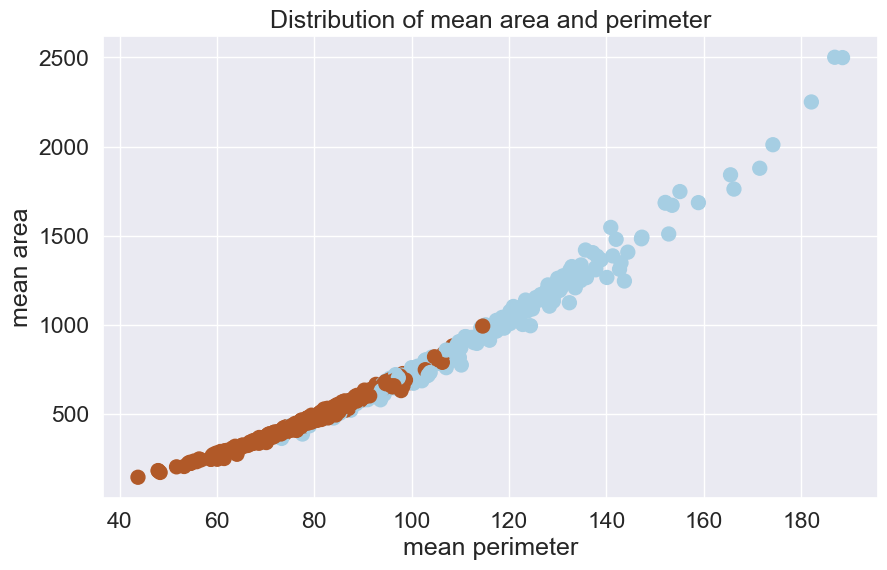

In [464]:
# Loading cancer data
cancer_data = datasets.load_breast_cancer()

df_cancer = pd.DataFrame(data= cancer_data.data, columns=cancer_data.feature_names)

print(cancer_data.feature_names)

# Scatter diagram for mean area and mean perimeter
plt.figure(figsize=(10, 6))
plt.scatter(cancer_data.data[:,2], cancer_data.data[:,3], c=cancer_data.target, cmap=plt.cm.Paired, s=100)
plt.title("Distribution of mean area and perimeter")
plt.xlabel(cancer_data.feature_names[2])
plt.ylabel(cancer_data.feature_names[3])
plt.show()

b) The features are not suitable for Logistic regression because the featueres can not be divived into distinct features. Mean Perimeter and mean area are too interconnted to make any good regression line to sperate the data

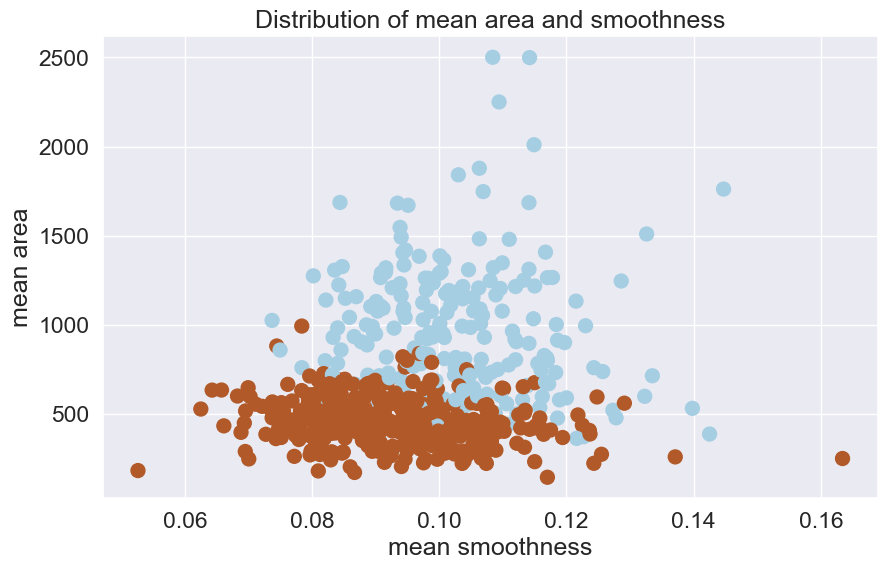

In [465]:
# Scatter diagram for mean area and mean smoothness
plt.figure(figsize=(10, 6))
plt.scatter(cancer_data.data[:,4], cancer_data.data[:,3], c=cancer_data.target, cmap=plt.cm.Paired, s=100)
plt.title("Distribution of mean area and smoothness")
plt.xlabel(cancer_data.feature_names[4])
plt.ylabel(cancer_data.feature_names[3])
plt.show()

d) Yes these features can be classified because they can be clearly spearted by a line

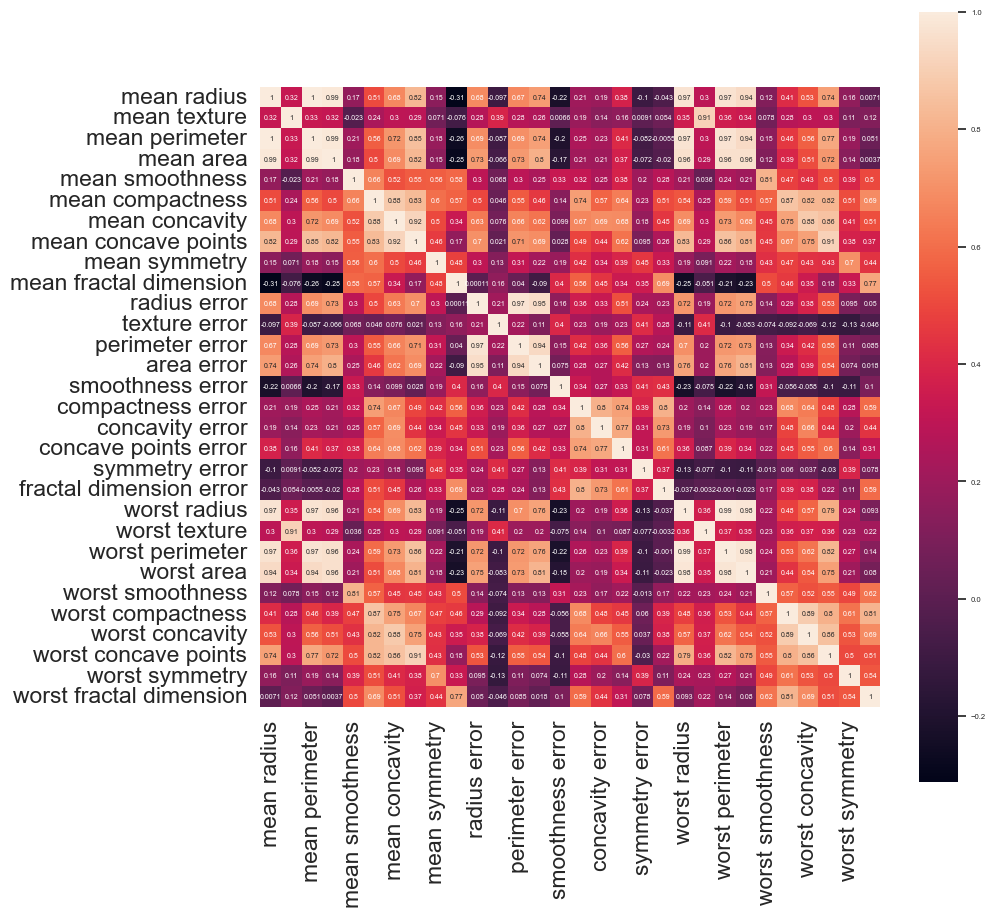

In [466]:
# creating a heatmap to see what values 
fig = plt.subplots(figsize=(10,10))
sns.set(font_scale=0.5)
sns.heatmap(df_cancer.corr(), square=True, cbar=True, annot=True, annot_kws={"size":5})
plt.show()

As seen by the heatmap mean fractal dimension and mean radius can be used to effectively classify breast tumours

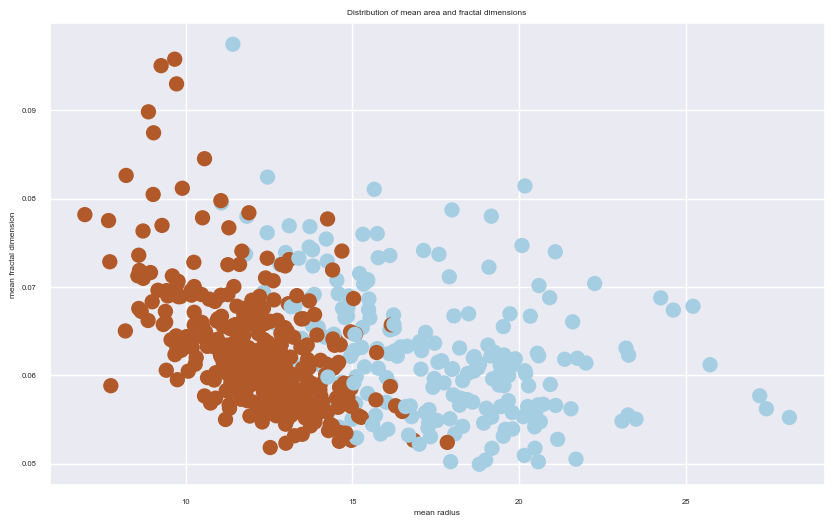

In [467]:
plt.figure(figsize=(10, 6))
plt.scatter(cancer_data.data[:,0], cancer_data.data[:,9], c=cancer_data.target, cmap=plt.cm.Paired, s=100)
plt.title("Distribution of mean area and fractal dimensions")
plt.xlabel(cancer_data.feature_names[0])
plt.ylabel(cancer_data.feature_names[9])
plt.show()

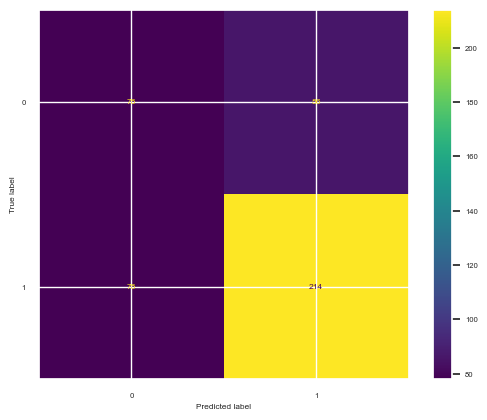

In [468]:
# Getting these two features from the dataset
df_cancer.shape  #used to show what values are needed to reshape the new data

mean_fractal_and_radius = np.reshape(np.vstack((cancer_data.data[:, 0], cancer_data.data[:, 9])), (569, 2)) 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    mean_fractal_and_radius, cancer_data.target, test_size=0.8, random_state=state
)

# getting the model
cancer_model = LogisticRegression()

# Training the model
cancer_model.fit(X_train, y_train)

predicted_cancer = cancer_model.predict(X_test)

cm = metrics.confusion_matrix(y_test, predicted_cancer)

display_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
display_matrix.plot()
plt.show()



In [469]:
TN = cm[0, 0]
FP = cm[0 ,1]
FN = cm[1 ,0]
TP = cm[1, 1]

precision = TP /(TP + FP)
Recall = TP / (TP + FN)
F1 = precision * Recall / (precision + Recall)

print(f"The precision is: {precision}, the Recall score : {Recall}, the F1 score is: {F1}")


The precision is: 0.7133333333333334, the Recall score : 0.7328767123287672, the F1 score is: 0.3614864864864865


I think recall is the feature that should be most important because the model should be good at predicting if the cancer is malignant. if a Benign cancer is classified as malignant it coulod be a problem 